Website: https://medium.com/@prayaaggupta/how-to-determine-optimal-stock-portfolio-weights-using-python-and-quantopian-a89cd6376ded

In [12]:
# This is a template we loaded to graph and summarize data
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
start = datetime.datetime(2019, 1 , 1)
end = datetime.datetime.today()

# Creating a dictionary for our data
data_dict = {}
stocks = ["TREX", "STMP", "ENPH", "IPGP", "NICE", "TNC", "MANH", "CYBR", "SNA", 
          "PLNT", "THO", "AMN", "VAR", "WEX", "RHI", "VFSUX", "VHYAX", "VOO"]
for key in stocks:
    data_dict[key] = web.DataReader(key, 'yahoo', start, end)

In [2]:
# This is summarizing the closing price of the stocks we are tracking in our dictionary into a table
close_data = pd.concat([val["Close"] for val in data_dict.values()], keys = data_dict.keys(), axis = 1)
close_data

,TREX,STMP,ENPH,IPGP,NICE,TNC,MANH,CYBR,SNA,PLNT,THO,AMN,VAR,WEX,RHI,VFSUX,VHYAX,VOO
Date,,,,,,,,,,,,,,,,,,
2019-01-02,30.514999,150.669998,4.920000,114.760002,106.849998,52.740002,42.189999,73.239998,147.460007,53.580002,52.240002,55.650002,112.669998,138.720001,56.540001,10.45,NaN,229.990005
2019-01-03,30.389999,147.970001,4.760000,108.599998,104.959999,51.189999,41.189999,69.910004,145.460007,52.799999,51.160000,54.410000,109.800003,134.580002,52.900002,10.47,NaN,224.500000
2019-01-04,32.020000,154.690002,5.080000,114.720001,107.730003,52.720001,42.599998,69.419998,150.770004,54.919998,54.099998,55.919998,118.650002,141.940002,56.090000,10.45,NaN,231.910004
2019-01-07,32.514999,161.570007,5.260000,116.809998,107.309998,53.610001,43.349998,72.779999,152.699997,55.840000,56.820000,55.049999,121.930000,144.679993,55.900002,10.44,NaN,233.649994
2019-01-08,33.250000,162.020004,5.350000,120.800003,107.750000,54.930000,44.700001,77.730003,154.649994,57.619999,57.380001,58.349998,122.620003,150.570007,57.340000,10.43,NaN,235.919998
2019-01-09,34.049999,167.000000,5.630000,126.269997,106.419998,55.139999,45.230000,77.320000,157.759995,58.310001,60.500000,59.310001,123.330002,155.000000,58.330002,10.44,NaN,237.009995
2019-01-10,33.945000,171.750000,5.630000,128.520004,107.239998,56.250000,45.080002,78.580002,160.110001,58.630001,59.630001,59.810001,124.040001,155.940002,58.189999,10.44,NaN,238.000000
2019-01-11,34.119999,172.199997,5.680000,127.879997,107.620003,56.400002,45.750000,77.919998,160.330002,58.799999,59.720001,60.830002,125.650002,155.630005,58.380001,10.45,NaN,237.889999
2019-01-14,33.415001,170.610001,5.820000,127.110001,103.760002,55.590000,45.240002,77.080002,162.130005,57.220001,62.200001,61.160000,123.720001,154.960007,58.299999,10.45,NaN,236.580002


In [4]:
import numpy as np

# Set seed (optional)
np.random.seed(101)

# Stock Columns
print(close_data)
print('\n')

# Log return data
ret_data = close_data.pct_change()[1:]
ret_data

# Create Random Weights - divided by sum of weights to ensure weights add to 1.0
print('Creating  Weights')
weights = np.array(np.random.random(18))
print(weights/np.sum(weights))
print('\n')

# Expected Return
print('Expected Portfolio Return')
log_ret = (ret_data)
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

                 TREX        STMP        ENPH        IPGP        NICE  \
Date                                                                    
2019-01-02  30.514999  150.669998    4.920000  114.760002  106.849998   
2019-01-03  30.389999  147.970001    4.760000  108.599998  104.959999   
2019-01-04  32.020000  154.690002    5.080000  114.720001  107.730003   
2019-01-07  32.514999  161.570007    5.260000  116.809998  107.309998   
2019-01-08  33.250000  162.020004    5.350000  120.800003  107.750000   
2019-01-09  34.049999  167.000000    5.630000  126.269997  106.419998   
2019-01-10  33.945000  171.750000    5.630000  128.520004  107.239998   
2019-01-11  34.119999  172.199997    5.680000  127.879997  107.620003   
2019-01-14  33.415001  170.610001    5.820000  127.110001  103.760002   
2019-01-15  33.325001  172.509995    6.150000  125.900002  105.330002   
2019-01-16  33.349998  173.369995    6.680000  128.339996  104.360001   
2019-01-17  34.174999  171.669998    6.820000  129.

In [5]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(18))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [6]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])
  
from scipy.optimize import minimize
  
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1
  
  # Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1
  
  # By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

# 0-1 bounds for each weight
bounds = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

# Initial Guess (equal distribution)
init_guess = [0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0555,0.0565]

# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method = 'SLSQP',bounds=bounds,constraints=cons)

opt_results #maximum sharpe value is actually 2.69

     fun: -2.7203096014701464
     jac: array([ 8.47777516e-01,  7.79643655e-03, -2.01511383e-03, -7.83085823e-04,
       -2.90721655e-04,  4.52391717e+00,  1.92414507e+00,  5.14867866e+00,
        5.27986178e+00,  9.09276038e+00,  5.79873955e+00,  1.56736416e+00,
        1.11964536e+00,  9.21343231e+00,  4.66436979e+00,  7.44163990e-05,
        6.18469760e+00,  3.68312639e+00])
 message: 'Optimization terminated successfully'
    nfev: 822
     nit: 42
    njev: 42
  status: 0
 success: True
       x: array([0.00000000e+00, 3.42809688e-03, 3.82168041e-02, 9.23869445e-03,
       3.56082591e-02, 2.09677783e-15, 1.47045216e-15, 1.32995763e-15,
       2.64638579e-15, 0.00000000e+00, 3.67426023e-15, 0.00000000e+00,
       4.67170710e-16, 0.00000000e+00, 0.00000000e+00, 9.13508146e-01,
       1.37534497e-15, 5.29839686e-17])

In [7]:
# Greatest Sharpe Ratio Value
sharpe_arr.max()

1.8483408189352049

In [8]:
# location of greatest sharpe Ratio value in the array
sharpe_arr.argmax()

1069

In [9]:
# The desired weights for the portfolio according to the monte carlo simulation
all_weights[1069,:] 

array([0.00995406, 0.10919156, 0.1563269 , 0.03387065, 0.11559516,
       0.07132176, 0.00302709, 0.03938168, 0.00160142, 0.0066049 ,
       0.05293741, 0.08736601, 0.13303452, 0.0054166 , 0.04875752,
       0.048949  , 0.00021261, 0.07645116])

In [10]:
max_sr_ret = ret_arr[1069]
max_sr_vol = vol_arr[1069]

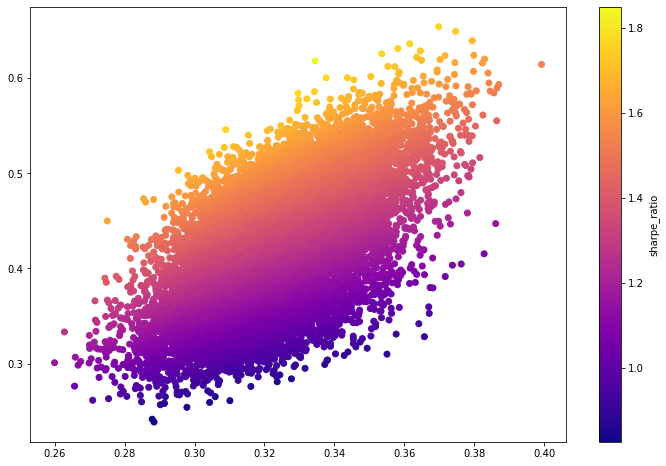

In [13]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='sharpe_ratio')
plt.xlabel=('Volatility')
plt.ylabel=('Return')

Website: https://www.codingfinance.com/post/2018-04-10-cumulative-portfolio-returns-py/

In [21]:
weighted_returns = (all_weights[1069,:] * ret_data)
print(weighted_returns.head())

                TREX      STMP      ENPH      IPGP      NICE       TNC  \
Date                                                                     
2019-01-03 -0.000041 -0.001957 -0.005084 -0.001818 -0.002045 -0.002096   
2019-01-04  0.000534  0.004959  0.010509  0.001909  0.003051  0.002132   
2019-01-07  0.000154  0.004856  0.005539  0.000617 -0.000451  0.001204   
2019-01-08  0.000225  0.000304  0.002675  0.001157  0.000474  0.001756   
2019-01-09  0.000239  0.003356  0.008182  0.001534 -0.001427  0.000273   

                MANH      CYBR       SNA      PLNT       THO       AMN  \
Date                                                                     
2019-01-03 -0.000072 -0.001791 -0.000022 -0.000096 -0.001094 -0.001947   
2019-01-04  0.000104 -0.000276  0.000058  0.000265  0.003042  0.002425   
2019-01-07  0.000053  0.001906  0.000020  0.000111  0.002662 -0.001359   
2019-01-08  0.000094  0.002678  0.000020  0.000211  0.000522  0.005237   
2019-01-09  0.000036 -0.000208  0.000

In [22]:
port_ret = weighted_returns.sum(axis=1)
# axis =1 tells pandas we want to add
# the rows

In [23]:
cumulative_ret = (port_ret + 1).cumprod()

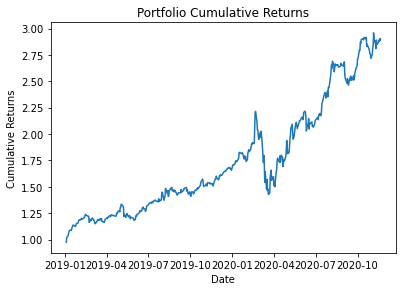

In [24]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(cumulative_ret)
ax1.set_xlabel('Date')
ax1.set_ylabel("Cumulative Returns")
ax1.set_title("Portfolio Cumulative Returns")
plt.show();